In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
dataset = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
x = dataset.iloc[:,:-1]
y= dataset.iloc[:,-1]


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = regressor.predict(X_test)


In [12]:
print('Linear Regression Test Score is : ' , regressor.score(X_test, y_test))
print('Linear Regression Coef is : ' , regressor.coef_)
print('Linear Regression intercept is : ' , regressor.intercept_)

Linear Regression Test Score is :  0.3266402726986829
Linear Regression Coef is :  [ 0.54197374 -1.63286607 -0.27622752  0.29689756 -1.05780655  0.37983608
 -0.93804842 -0.49999324 -0.44158088  1.55264821  1.73080843]
Linear Regression intercept is :  5.759658011473058


In [13]:
from sklearn.metrics import mean_squared_error,r2_score

lt_score =regressor.score(X_test, y_test)
lt_rmse =mean_squared_error(y_test, y_pred,squared=False)
print('root square error is',lt_score)

print('RMSE', lt_rmse)

root square error is 0.3266402726986829
RMSE 0.6189280908000767


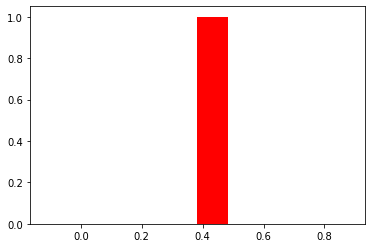

In [14]:
plt.hist(mean_squared_error(y_test, y_pred),color='red')
plt.show()

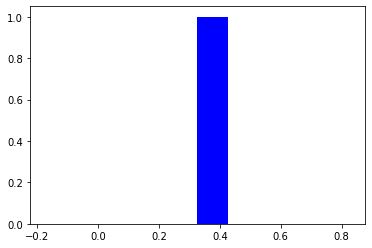

In [15]:
plt.hist(regressor.score(X_test, y_test),color='blue')
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 1)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly, y_train)

y_poly_pred = lin_reg_2.predict(X_test_poly)

In [17]:
poly_score = r2_score(y_test,y_poly_pred)
poly_rmse = mean_squared_error(y_test, y_poly_pred,squared=False)
print('root square error is',poly_score)

print('RMSE', poly_rmse)

root square error is 0.326640272698683
RMSE 0.6189280908000767


In [18]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test)
dtr_rmse = mean_squared_error(y_test,y_pred_dtr,squared=False)
dtr_acc = dtr.score(X_test,y_test)

print('Decision Tree:')
print('Accuracy Score:', dtr_acc)
print('RMSE:',dtr_rmse)

Decision Tree:
Accuracy Score: -0.13706977941807574
RMSE: 0.8042853971072706


In [19]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)
svr_rmse = mean_squared_error(y_test,y_pred_svr,squared=False)
svr_acc = svr.score(X_test,y_test)

print('SVR:')
print('Accuracy Score:', svr_acc)
print('RMSE:',svr_rmse)

SVR:
Accuracy Score: 0.3264101701606289
RMSE: 0.6190338327639069


In [20]:
from sklearn.ensemble import RandomForestRegressor
rgfr = RandomForestRegressor()
rgfr.fit(X_train,y_train)
y_pred_rgfr=rgfr.predict(X_test)
rgfr_acc=rgfr.score(X_test,y_test)
rgfr_rmse=mean_squared_error(y_test,y_pred_rgfr,squared=False)

print('RGFR:')
print('Accuracy Score:', rgfr_acc)
print('RMSE:',rgfr_rmse)

RGFR:
Accuracy Score: 0.4330152604926615
RMSE: 0.5679398075500607


In [21]:
models = ['LT','PR','DTR','SVR','RGFR']
score = [lt_score,poly_score,dtr_acc,svr_acc,rgfr_acc]
rmse = [lt_rmse,poly_rmse,dtr_rmse,svr_rmse,rgfr_rmse]

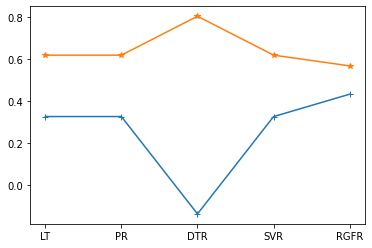

In [22]:
plt.plot(models,score,marker='+')
plt.plot(models,rmse,marker='*')

<BarContainer object of 5 artists>

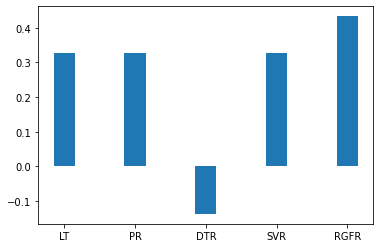

In [23]:
plt.bar(models,score,width=0.3)


<BarContainer object of 5 artists>

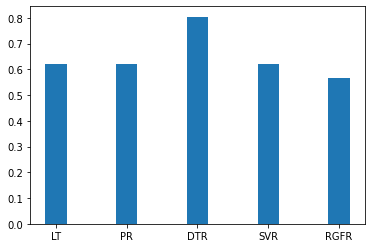

In [24]:
plt.bar(models,rmse,width=0.3)